# **SE4050 - Lab 8**

 We highly recommend you to run this notebook, so you can get familiar with the basic concepts of graphs and networks.

In this Colab, we will introduce a graph related package, [NetworkX](https://networkx.org/documentation/stable/).

NetworkX is one of the most frequently used Python packages to create, manipulate, and mine graphs.

Main parts of this tutorial are adapted from https://colab.research.google.com/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/libraries/NetworkX.ipynb#scrollTo=zA1OO6huHeV6

Please make a copy before you proceed.

In [2]:
# Upgrade packages
!pip install --upgrade scipy networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 522.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 8.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


In [3]:
# Import the NetworkX package
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

## Graph
NetworkX provides several classes to store different types of graphs, such as directed and undirected graph. It also provides classes to create multigraphs (both directed and undirected).

For more information, please refer to [NetworkX graph types](https://networkx.org/documentation/stable/reference/classes/index.html).

In [4]:
# Create an undirected graph G
G = nx.Graph()
print(G.is_directed())

# Create a directed graph H
H = nx.DiGraph()
print(H.is_directed())

# Add graph level attribute
G.graph["Name"] = "Bar"
print(G.graph)

False
True
{'Name': 'Bar'}


## Node

Nodes (with attributes) can be easily added to NetworkX graphs.

In [5]:
# Add one node with node level attributes
G.add_node(0, feature=5, label=0)

# Get attributes of the node 0
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))

Node 0 has the attributes {'feature': 5, 'label': 0}


In [6]:
G.nodes(data=True)

NodeDataView({0: {'feature': 5, 'label': 0}})

In [7]:
# Add multiple nodes with attributes
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2})
]) #(node, attrdict)

# Loop through all the nodes
# Set data=True will return node attributes
for node in G.nodes(data=True):
  print(node)

# Get number of nodes
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

(0, {'feature': 5, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
G has 3 nodes


## Edge

Similar to nodes, edges (with attributes) can also be easily added to NetworkX graphs.

In [8]:
# Add one edge with edge weight 0.5
G.add_edge(0, 1, weight=0.5)

# Get attributes of the edge (0, 1)
edge_0_1_attr = G.edges[(0, 1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))

Edge (0, 1) has the attributes {'weight': 0.5}


In [9]:
# Add multiple edges with edge weights
G.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 0, {"weight": 0.1})
])

# Loop through all the edges
# Here there is no data=True, so only the edge will be returned
for edge in G.edges():
  print(edge)

# Get number of edges
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))

(0, 1)
(0, 2)
(1, 2)
G has 3 edges


## Visualization

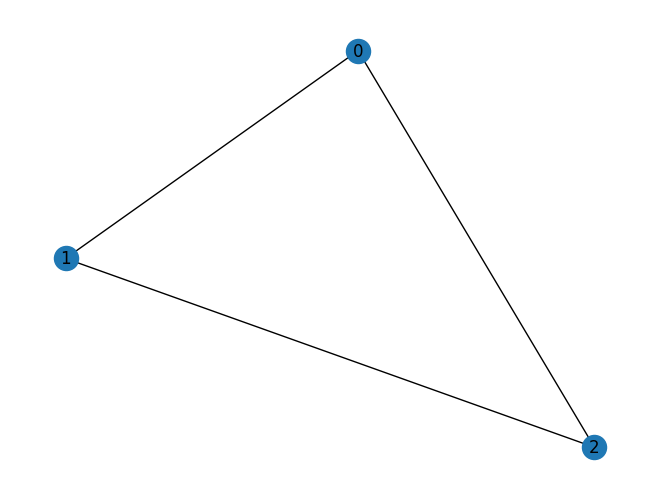

In [10]:
# Draw the graph
nx.draw(G, with_labels = True)

## Node Degree and Neighbor

In [11]:
node_id = 1

# Degree of node 1
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

# Get neighbor of node 1
for neighbor in G.neighbors(node_id):
  print("Node {} has neighbor {}".format(node_id, neighbor))

Node 1 has degree 2
Node 1 has neighbor 0
Node 1 has neighbor 2


## Random Graph creation and analysis

In [12]:
# creation of a random network with N nodes and E edges - this a erdos-renyi graph
def create(n,m):
    G = nx.gnm_random_graph(n, m, seed = random_state)
    return G

In [14]:
def degree_analysis(G):
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

    fig = plt.figure("Degree of a random graph", figsize=(8, 8))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(2, 4)


    ax1 = fig.add_subplot(axgrid[:, :2])
    ax1.plot(degree_sequence, "b-", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")

    ax2 = fig.add_subplot(axgrid[:, 2:])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title("Degree histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")

    plt.show()

In [15]:
random_state = np.random.RandomState(42)
N=20 #number of nodes
E=2*N #number of edges
G=create(N,E)

In [16]:
print(G.edges(nbunch=4))
print(G.adj)
print(G.edges)
print(type(G))
print(len(G.edges))

[(4, 18), (4, 9)]
{0: {11: {}, 12: {}, 2: {}, 1: {}}, 1: {11: {}, 5: {}, 19: {}, 9: {}, 0: {}}, 2: {7: {}, 19: {}, 14: {}, 0: {}}, 3: {10: {}, 13: {}, 17: {}, 7: {}, 9: {}}, 4: {18: {}, 9: {}}, 5: {1: {}}, 6: {19: {}, 7: {}, 8: {}, 17: {}, 14: {}}, 7: {6: {}, 2: {}, 11: {}, 3: {}, 13: {}, 15: {}, 10: {}}, 8: {6: {}, 17: {}, 14: {}}, 9: {15: {}, 3: {}, 1: {}, 4: {}}, 10: {14: {}, 18: {}, 3: {}, 7: {}}, 11: {1: {}, 0: {}, 16: {}, 18: {}, 7: {}, 17: {}}, 12: {17: {}, 14: {}, 0: {}}, 13: {3: {}, 16: {}, 7: {}}, 14: {10: {}, 6: {}, 2: {}, 15: {}, 12: {}, 8: {}}, 15: {9: {}, 14: {}, 7: {}}, 16: {11: {}, 13: {}, 18: {}}, 17: {6: {}, 8: {}, 3: {}, 11: {}, 12: {}}, 18: {10: {}, 11: {}, 4: {}, 16: {}}, 19: {6: {}, 2: {}, 1: {}}}
[(0, 11), (0, 12), (0, 2), (0, 1), (1, 11), (1, 5), (1, 19), (1, 9), (2, 7), (2, 19), (2, 14), (3, 10), (3, 13), (3, 17), (3, 7), (3, 9), (4, 18), (4, 9), (6, 19), (6, 7), (6, 8), (6, 17), (6, 14), (7, 11), (7, 13), (7, 15), (7, 10), (8, 17), (8, 14), (9, 15), (10, 14), 

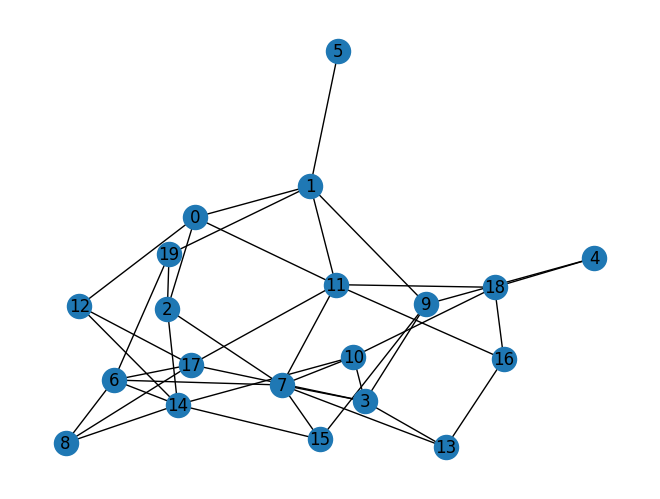

In [17]:
pos_cons = nx.spring_layout(G,seed = random_state)
nx.draw(G, pos=pos_cons,labels ={node:node for node in G.nodes()}) #spring_layout , spectral_layout
plt.draw()


In [18]:
# Get the adjacency matrix
A = nx.adjacency_matrix(G).toarray()
print("Adjacency Matrix:")
print(A)



# Get the degree matrix

# add your code here



# Get the Laplacian matrix

# add your code here

Adjacency Matrix:
[[0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1]
 [0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0]
 [0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0]
 [1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0]
 [0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0]
 [0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]]


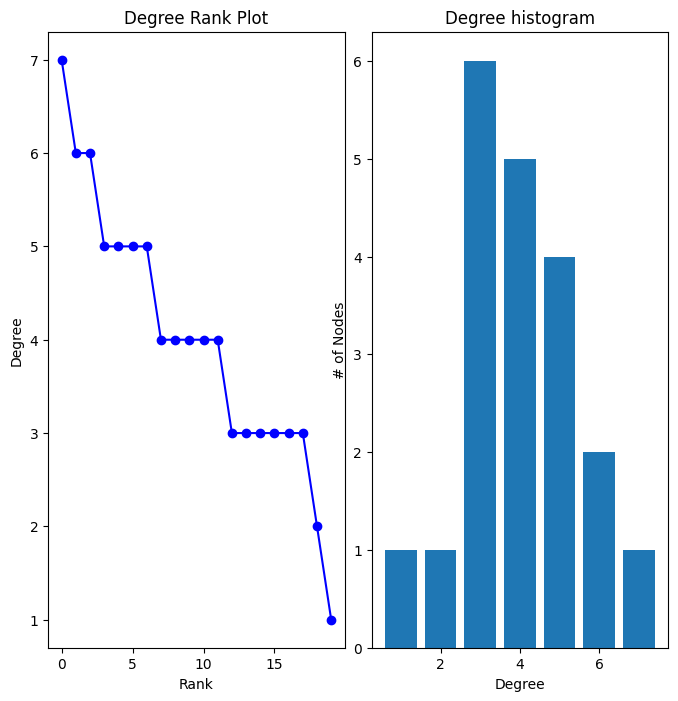

In [19]:
degree_analysis(G)

In [23]:
# calculate the graph density for the above created random graph
#(D = graph density, |V| = number of nodes and |E| = number of edges).
#       D=   (2|E|)
#          ----------
#         {|V|(|V|-1)}

D = 2 * len(G.edges) / (len(G.nodes) * (len(G.nodes) - 1))
print(f"The density of the graph is: {D}")


The density of the graph is: 0.21052631578947367


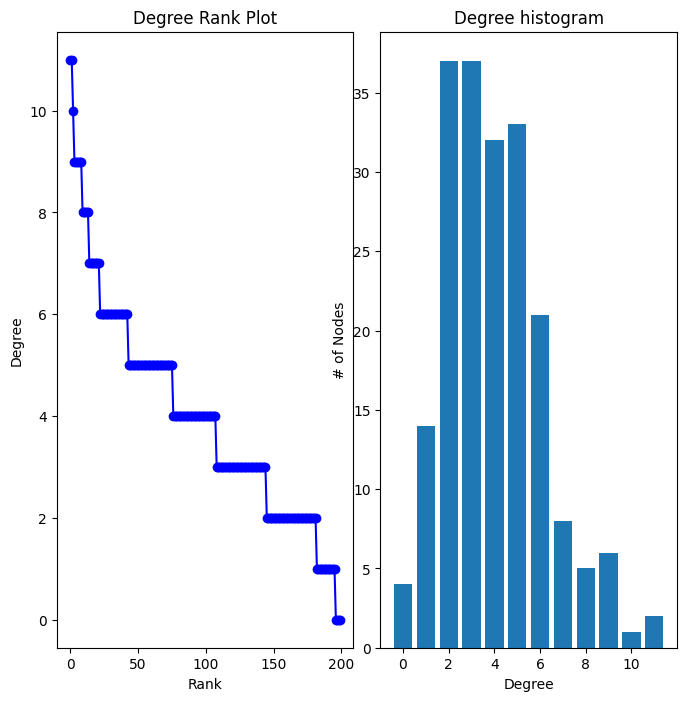

The density of the graph is: 0.020100502512562814


In [25]:
#increase the N from 20 to 200 and observe graph density and degree distribution and explain what you observe

random_state = np.random.RandomState(42)
N=200 #number of nodes
E=2*N #number of edges
G=create(N,E)
degree_analysis(G)

D = 2 * len(G.edges) / (len(G.nodes) * (len(G.nodes) - 1))
print(f"The density of the graph is: {D}")

When increase the N value (number of nodes) from 20 to 200 while keeping the ratio of edges to nodes constant (E = 2*N), we can observe the following things:-

**Graph Density:** The graph density will decrease as N increases. This is because the number of possible edges in a graph increases much faster than the number of actual edges as you add more nodes. The formula for density is D = 2 * |E| / (|V| * (|V| - 1)), and since you're keeping E proportional to N, the denominator grows much faster than the numerator.

**Degree Distribution:** The degree distribution will become more concentrated around the average degree. With more nodes and a constant edge-to-node ratio, the degrees of individual nodes are likely to be closer to the average. The degree distribution plots (histograms) will likely show a taller peak around the average degree and a narrower spread as N increases.

**In simpler terms, as we add more nodes to the graph while maintaining the same ratio of edges to nodes, the graph becomes more sparse (less dense). The connections become more evenly distributed, and most nodes have a similar number of connections (degree).**